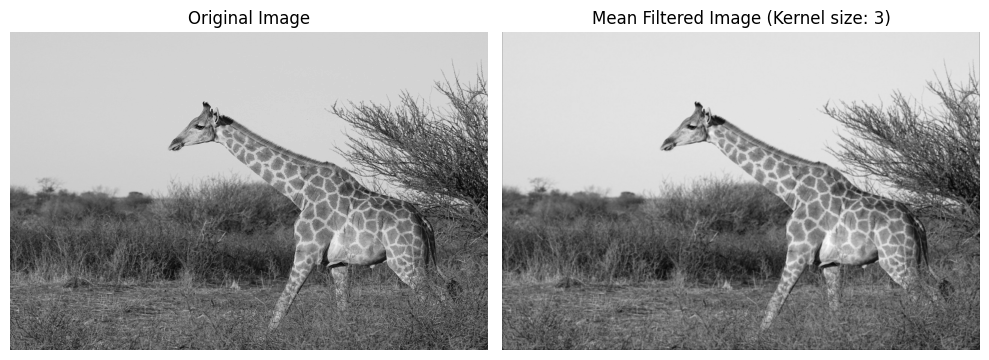

Mean-filtered image saved as mean_filtered.jpg


In [1]:
# mean_filter.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_mean_filter(input_path, output_path, kernel_size):
    # Open the image and convert it to grayscale
    img = Image.open(input_path).convert("L")
    img_array = np.array(img)

    # Get the dimensions of the image
    height, width = img_array.shape

    # Create an empty array for the filtered image
    filtered_array = np.zeros_like(img_array)

    # Define the size of the kernel (window)
    pad_size = kernel_size // 2

    # Pad the image with zeros around the border (to handle edge cases)
    padded_img = np.pad(img_array, pad_width=pad_size, mode='constant', constant_values=0)

    # Apply the mean filter
    for i in range(height):
        for j in range(width):
            # Extract the neighborhood for each pixel (kernel_size x kernel_size window)
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            # Compute the mean of the neighborhood
            mean_value = np.mean(neighborhood)
            # Assign the mean value to the corresponding pixel in the filtered image
            filtered_array[i, j] = mean_value

    # Convert the filtered array back to an image
    filtered_img = Image.fromarray(filtered_array.astype(np.uint8))

    # Save the filtered image
    filtered_img.save(output_path)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # Display filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap="gray")
    plt.title(f"Mean Filtered Image (Kernel size: {kernel_size})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          # Replace with the path to your input image
    output_path = "mean_filtered.jpg"  # Desired output image path
    kernel_size = 3                   # Kernel size (3x3 window)
    apply_mean_filter(input_path, output_path, kernel_size)
    print(f"Mean-filtered image saved as {output_path}")
